#   📊 Study Group Analysis: Impact on Exam Performance

This project explores how study group participation and attendance affect student exam scores. Using a dataset of 50 students, we apply statistical techniques to uncover patterns, test hypotheses, and build predictive models.

## Load the Data 

In [6]:
import pandas as pd 

df = pd.read_csv('Datas.csv')
df.head()

,Name,Age,ExamScore,Attendance,StudyGroup
0,Ada01,21,88,45,Yes
1,Kunle02,18,74,32,No
2,Tola03,20,95,58,Yes
3,Sofi04,19,65,22,No
4,Omar05,22,51,14,No


## 🔧 Step 1: Encode StudyGroup

We convert the categorical StudyGroup column into a binary format for analysis.

In [8]:
df['StudyGroupEnc'] = df['StudyGroup'].map({'Yes': 1, 'No': 0})
df.head()

,Name,Age,ExamScore,Attendance,StudyGroup,StudyGroupEnc
0,Ada01,21,88,45,Yes,1
1,Kunle02,18,74,32,No,0
2,Tola03,20,95,58,Yes,1
3,Sofi04,19,65,22,No,0
4,Omar05,22,51,14,No,0


# Average of score and studygroup
we calculate the average score of the exam scores and the study group

In [12]:
df[['ExamScore','StudyGroupEnc']].mean() 


ExamScore        73.90
StudyGroupEnc     0.46
dtype: float64

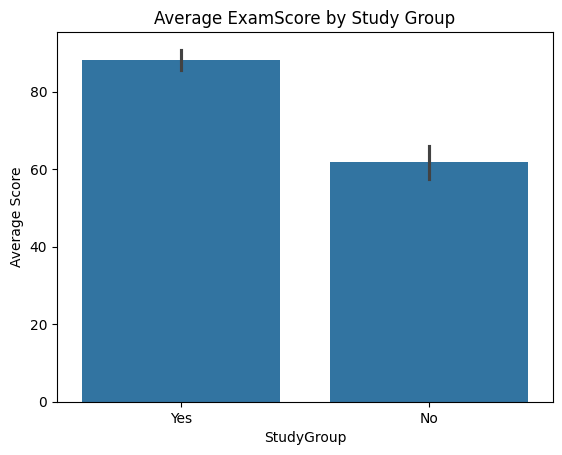

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='StudyGroup', y='ExamScore', data=df)
plt.title('Average ExamScore by Study Group')
plt.ylabel('Average Score')
plt.show()

# Confidence Interval
we calculate the confidence interval to be  95%{1.96}

In [14]:
import numpy as np 
import scipy.stats as stats 

mean = np.mean(df['StudyGroupEnc'])
std_dev = np.std(df['StudyGroupEnc'],ddof=1)
n = len(df['StudyGroupEnc'])
z = 1.96

margin_error = z * (std_dev / np.sqrt(n))
low_bound = mean - margin_error
up_bound = mean + margin_error

print(f'95 percent  confidence interval :({low_bound:2f},{up_bound:2f})')


95 percent  confidence interval :(0.320449,0.599551)


# Hypothesis Testing 
we check the the group of the study group with more significant in the exam score using hypothesis testing 

In [22]:
group_yes = df[df['StudyGroupEnc'] == 1]['ExamScore']
group_no = df[df['StudyGroupEnc'] == 0]['ExamScore']

t_stat , p_value = stats.ttest_ind(group_yes,group_no)

print("t_statistics",t_stat)
print("p-Value",p_value)

t_statistics 10.182190000484646
p-Value 1.3978380685838396e-13


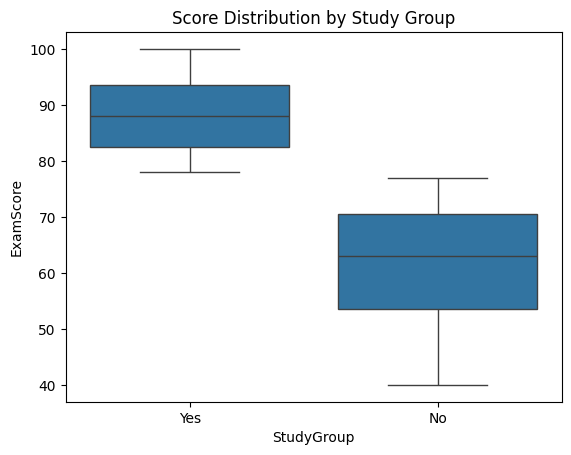

In [30]:
sns.boxplot(x='StudyGroup', y='ExamScore', data=df)
plt.title('Score Distribution by Study Group')
plt.show()

#  Corrolation 
we check the one that has more corrolation with the exam score between age and attendance 

### Age vs Score

In [16]:
df[['Age','ExamScore']].corr()

,Age,ExamScore
Age,1.000000,-0.017578
ExamScore,-0.017578,1.000000


### Attendance vs Score

In [17]:
df[['Attendance','ExamScore']].corr()

,Attendance,ExamScore
Attendance,1.000000,0.968898
ExamScore,0.968898,1.000000


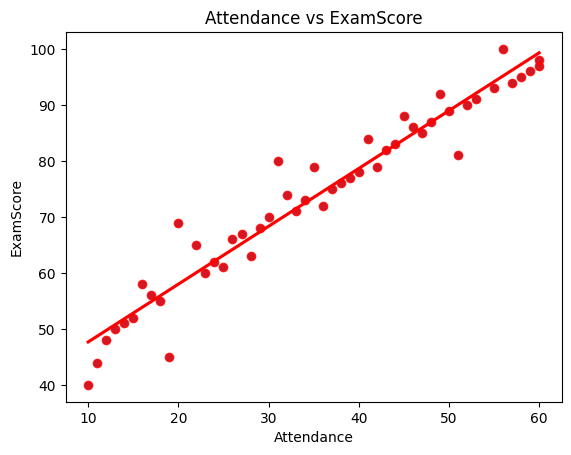

In [31]:
sns.scatterplot(x='Attendance', y='ExamScore', data=df)
sns.regplot(x='Attendance', y='ExamScore', data=df, ci=None, color='red')
plt.title('Attendance vs ExamScore')
plt.show()

# Regression 
Then we calculate the prediction of the exam score from the attendance using linear regression

In [23]:
import statsmodels.api as sm 

x  = df['Attendance']
y = df ['ExamScore']

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ExamScore   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     735.9
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           9.13e-31
Time:                        13:48:47   Log-Likelihood:                -139.39
No. Observations:                  50   AIC:                             282.8
Df Residuals:                      48   BIC:                             286.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3466      1.462     25.543      0.0

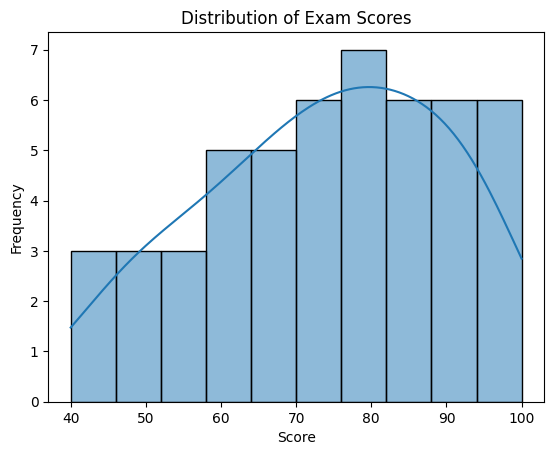

In [32]:
sns.histplot(df['ExamScore'], bins=10, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## ✅ Summary of Findings

- Students who joined the study group scored significantly higher (p < 0.0000000000001)
- Attendance is a strong predictor of performance (R² = 0.939)
- Age has no meaningful impact on scores

This analysis demonstrates how participation and consistency drive academic success.